In [5]:
from scipy import spatial
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import spacy
nlp = spacy.load("en_core_web_md")

# word similarity is calculated using cosine similarity
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

def find_nearest_neighbours(main_word):
    main_word_vector = nlp.vocab[main_word].vector
    computed_similarities = []
    for word in nlp.vocab:
        if word.has_vector:
            similarity = cosine_similarity(main_word_vector, word.vector)
            computed_similarities.append((word, similarity))

    # Sort by highest similarity values
    return sorted(computed_similarities, key=lambda item: -item[1])

In [6]:
# Horizontal bar chart plot function
def plot_neighbours(neighbours):
    values = [w[1] for w in neighbours[1:6]]
    words = [w[0].text for w in neighbours[1:6]]
    plt.barh(words, values)
    plt.ylabel("Neighbours")
    plt.xlabel("Cosine similarity")
    plt.title("Nearest neighbours of " + neighbours[0][0].text)
    plt.show()

In [7]:
# Display table with similarity values
def display_table(words_list):
    display(Markdown(f'<table><tr><th></th><th>{words_list[1][0].text}</th><th>{words_list[2][0].text}</th><th>{words_list[3][0].text}</th><th>{words_list[4][0].text}</th><th>{words_list[5][0].text}</th></tr>\
    <tr><td>Similarity</td><td>{words_list[1][1]:{.4}}</td><td>{words_list[2][1]:{.4}}</td><td>{words_list[3][1]:{.4}}</td><td>{words_list[4][1]:{.4}}</td><td>{words_list[5][1]:{.4}}</td></tr>'))

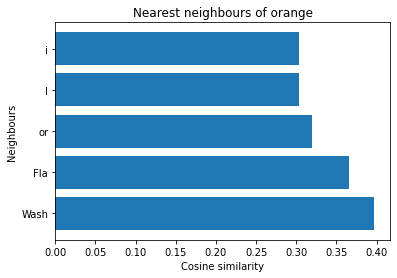

<table><tr><th></th><th>Wash</th><th>Fla</th><th>or</th><th>I</th><th>i</th></tr>    <tr><td>Similarity</td><td>0.3968</td><td>0.3653</td><td>0.3198</td><td>0.3033</td><td>0.3033</td></tr>

In [8]:
words_list = find_nearest_neighbours('orange')
plot_neighbours(words_list)
display_table(words_list)